# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import os
import json
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import requests
import datetime as dt # to put a datestamp on the outputs
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 #Create a random list of latitudes and longitudes
# np.random.uniform makes sure that all the numbers in the range get equal chance of getting picked

latitudes = np.random.uniform(-90, 90, size = 2000) # 500 random numbers from -90 to 90 deg latitude
longitudes = np.random.uniform(-180, 180, size = 2000) # 500 random numbers from -180 to 180 deg longitude

coordinates = list(zip(latitudes, longitudes))

In [3]:
# Nearby cities per latitude-longitude pair
cities = []

for coord in coordinates:
    lat, lon = coord
    cities.append(citipy.nearest_city(lat, lon))

In [4]:
# Set of cities
city_names = []
country = []

for city in cities:
    city_names.append(city.city_name) # loop through the city coordinates to get the city names
    country.append(city.country_code) # loop through the city coordinates to get the country codes
    
city_dict ={
    "latitude": latitudes,
    "longitude": longitudes,
    "city": city_names,
    "country": country
           }    

city_df = pd.DataFrame(city_dict)
city_df = city_df.drop_duplicates(["city","country"]) # drop city-country duplicates
city_df.head(10)

,latitude,longitude,city,country
0,73.045253,85.480945,dudinka,ru
1,-86.644488,-48.272001,ushuaia,ar
2,-1.426181,-160.693524,samusu,ws
3,-78.141147,171.215501,bluff,nz
4,-64.980978,-21.968551,chuy,uy
5,15.545155,24.346900,kutum,sd
6,60.906498,164.850343,tilichiki,ru
7,55.885076,108.460520,severobaykalsk,ru
8,-57.302567,11.941370,hermanus,za
9,48.209533,-57.273051,burgeo,ca


## Generate Cities List

In [5]:
# Setting the units to imperial to get Fahrenheit reading
settings = {"units": "Imperial", "appid": g_key}
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
lat = list(np.arange(-90,90.01,0.01))
long = list(np.arange(-180,180.01,0.01))

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#base_url = "http://api.openweathermap.org/data/2.5/weather?"
# Counter to go through data
record = 0
sets = 1
# Create DataFrame
weather_df = pd.DataFrame({"City": cities})
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Humidity"] = ""
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Max Temp"] = ""
weather_df["Wind Speed"] = ""
# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")
for index, row in weather_df.iterrows():
    city = row["City"]
    query_url = url + "&q=" + city
    #query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        print (query_url)
        weather_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[index, "Country"] = response["sys"]["country"]
        weather_df.loc[index, "Date"] = response["dt"]
        weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        weather_df.loc[index, "Latitude"] = response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = response["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        record += 1
    except:
        print("City not found...skipping.")
        print (query_url)
        weather_df.loc[index, "Cloudiness"] = ""
        weather_df.loc[index, "Country"] = ""
        weather_df.loc[index, "Date"] = ""
        weather_df.loc[index, "Humidity"] = ""
        weather_df.loc[index, "Latitude"] = ""
        weather_df.loc[index, "Longitude"] = ""
        weather_df.loc[index, "Max Temp"] = ""
        weather_df.loc[index, "Wind Speed"] = ""
        record = record + 1
       #time.sleep(1)
    if record == 50:
        record = 0
        sets = sets + 1
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | fortuna.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=fortuna
Processing Record 1  of Set 1 | leningradskiy.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=leningradskiy
Processing Record 2  of Set 1 | upernavik.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=upernavik
Processing Record 3  of Set 1 | mataura.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=mataura
Processing Record 4  of Set 1 | ushuaia.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=ushuaia
Processing Record 5  of Set 1 | hermanus.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=hermanus
Processing Reco

Processing Record 49  of Set 1 | kampot.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=kampot
Processing Record 0  of Set 2 | kiunga.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=kiunga
Processing Record 1  of Set 2 | louisbourg.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=louisbourg
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=louisbourg
Processing Record 2  of Set 2 | tasiilaq.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=tasiilaq
Processing Record 3  of Set 2 | beauchamps.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=beauchamps
Processing Record 4  of Set 2 | thompson.
http://api.openweathermap.org/data/2.5/weather

Processing Record 45  of Set 2 | ketchikan.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=ketchikan
Processing Record 46  of Set 2 | watrous.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=watrous
Processing Record 47  of Set 2 | agadez.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=agadez
Processing Record 48  of Set 2 | pevek.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=pevek
Processing Record 49  of Set 2 | faanui.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=faanui
Processing Record 0  of Set 3 | saint-pierre.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=saint-pierre
Processing Record 1  of Set 3 | kaitangata.
http://api.openweathermap.org/dat

Processing Record 45  of Set 3 | vaitape.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=vaitape
Processing Record 46  of Set 3 | nieves.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=nieves
Processing Record 47  of Set 3 | albany.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=albany
Processing Record 48  of Set 3 | nizwa.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=nizwa
Processing Record 49  of Set 3 | saldanha.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=saldanha
Processing Record 0  of Set 4 | longlac.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=longlac
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 44  of Set 4 | belmonte.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=belmonte
Processing Record 45  of Set 4 | matamoros.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=matamoros
Processing Record 46  of Set 4 | zhigansk.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=zhigansk
Processing Record 47  of Set 4 | launceston.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=launceston
Processing Record 48  of Set 4 | quang ngai.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=quang ngai
Processing Record 49  of Set 4 | taoudenni.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=taoudenni
Processing Record 0  of Set 5 | andilamena.
http://api.ope

Processing Record 47  of Set 5 | ashland.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=ashland
Processing Record 48  of Set 5 | sao filipe.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=sao filipe
Processing Record 49  of Set 5 | rungata.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=rungata
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=rungata
Processing Record 0  of Set 6 | srednekolymsk.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=srednekolymsk
Processing Record 1  of Set 6 | manokwari.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=manokwari
Processing Record 2  of Set 6 | paciran.
http://api.openweathermap.org/data/2

Processing Record 48  of Set 6 | bengkulu.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=bengkulu
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=bengkulu
Processing Record 49  of Set 6 | zhuji.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=zhuji
Processing Record 0  of Set 7 | kolokani.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=kolokani
Processing Record 1  of Set 7 | shagamu.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=shagamu
Processing Record 2  of Set 7 | cotonou.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=cotonou
Processing Record 3  of Set 7 | jorochito.
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 48  of Set 7 | la uribe.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=la uribe
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=la uribe
Processing Record 49  of Set 7 | palabuhanratu.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=palabuhanratu
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=palabuhanratu
Processing Record 0  of Set 8 | kalmunai.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=kalmunai
Processing Record 1  of Set 8 | urumqi.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=urumqi
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 47  of Set 8 | broken hill.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=broken hill
Processing Record 48  of Set 8 | amapa.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=amapa
Processing Record 49  of Set 8 | erdenet.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=erdenet
Processing Record 0  of Set 9 | vagur.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=vagur
Processing Record 1  of Set 9 | niltepec.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=niltepec
Processing Record 2  of Set 9 | gornopravdinsk.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=gornopravdinsk
Processing Record 3  of Set 9 | comodoro rivadavia.
http://api.openwe

Processing Record 49  of Set 9 | gazli.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=gazli
Processing Record 0  of Set 10 | neryungri.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=neryungri
Processing Record 1  of Set 10 | bowen.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=bowen
Processing Record 2  of Set 10 | mogzon.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=mogzon
Processing Record 3  of Set 10 | muli.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=muli
Processing Record 4  of Set 10 | antalaha.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=antalaha
Processing Record 5  of Set 10 | payyannur.
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 49  of Set 10 | isabela.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=isabela
Processing Record 0  of Set 11 | hun.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=hun
Processing Record 1  of Set 11 | khormuj.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=khormuj
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=khormuj
Processing Record 2  of Set 11 | san patricio.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=san patricio
Processing Record 3  of Set 11 | labuhan.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=labuhan
Processing Record 4  of Set 11 | fort-shevchenko.
http://api.openweathermap.org/data/2.5/weath

Processing Record 0  of Set 12 | ratlam.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=ratlam
Processing Record 1  of Set 12 | gidam.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=gidam
Processing Record 2  of Set 12 | xingtai.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=xingtai
Processing Record 3  of Set 12 | sorkjosen.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=sorkjosen
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=sorkjosen
Processing Record 4  of Set 12 | mount gambier.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=mount gambier
Processing Record 5  of Set 12 | urucara.
http://api.openweathermap.org/data/2.5/weat

Processing Record 49  of Set 12 | tyrma.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=tyrma
Processing Record 0  of Set 13 | jaysingpur.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=jaysingpur
Processing Record 1  of Set 13 | mastic beach.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=mastic beach
Processing Record 2  of Set 13 | sao joao da barra.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=sao joao da barra
Processing Record 3  of Set 13 | byron bay.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=byron bay
Processing Record 4  of Set 13 | otautau.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=otautau
Processing Record 5  of Set 13 | umm kaddadah

In [8]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'], unit = 's')

In [9]:
# Save the result to a csv file
weather_df.to_csv("vacation.csv")
# Count of the data in the dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,fortuna,1,US,2019-09-26 15:36:26,100,40.6,-124.16,55,20.09
1,leningradskiy,0,RU,2019-09-26 15:33:59,72,69.38,178.42,25.33,7.02
2,upernavik,100,GL,2019-09-26 15:33:54,58,72.79,-56.15,37.03,8.48
3,mataura,74,NZ,2019-09-26 15:33:33,81,-46.19,168.86,48,15.01
4,ushuaia,75,AR,2019-09-26 15:31:39,92,-54.81,-68.31,50,13.87


In [10]:
# Count of the data in the dataframe
weather_df.count()

City          607
Cloudiness    607
Country       607
Date          549
Humidity      607
Latitude      607
Longitude     607
Max Temp      607
Wind Speed    607
dtype: int64

In [11]:
weather_df.dtypes

City                  object
Cloudiness            object
Country               object
Date          datetime64[ns]
Humidity              object
Latitude              object
Longitude             object
Max Temp              object
Wind Speed            object
dtype: object

In [12]:
weather_df.replace("", np.nan, inplace = True)
weather_df = weather_df.dropna()
weather_df.head()
print(f"There are {len(weather_df)} cities included in the weather analyses.")

There are 549 cities included in the weather analyses.


In [13]:
#Choose ggplot as style for plots
plt.style.use('ggplot')

# Size of plots
fig_size = plt.rcParams["figure.figsize"] # get current size
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size # customise plot size

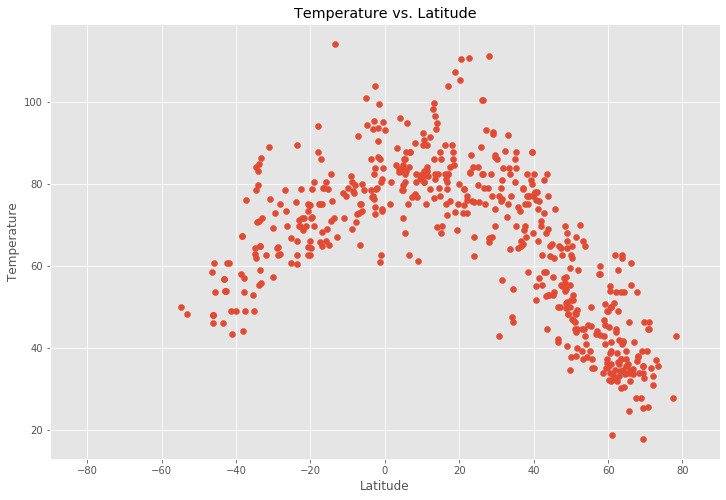

In [14]:
# Latitude vs Temperature
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.xlim(-90,90)
plt.title("Temperature vs. Latitude")

# Save image
plt.savefig("weather_df{}.png")
plt.show()

#### Latitude vs. Humidity Plot

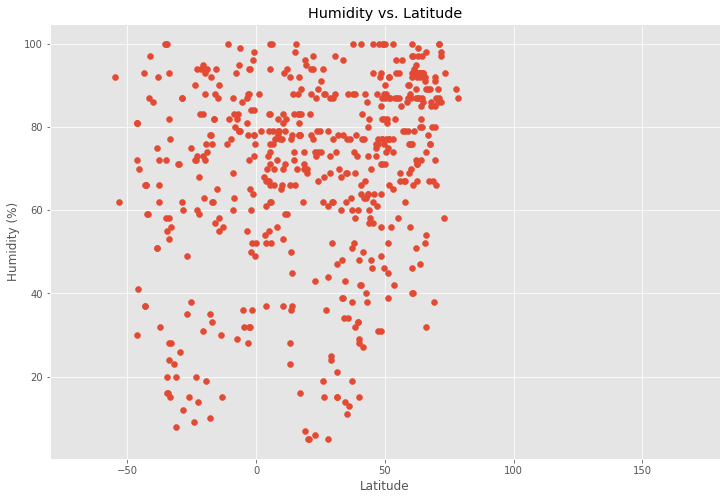

In [15]:
# Latitude vs Humidity

# Latitude vs Humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-80,180)
plt.title("Humidity vs. Latitude")
# Save image
plt.savefig("weather_df{}.png")
plt.show()

#### Latitude vs. Cloudiness Plot

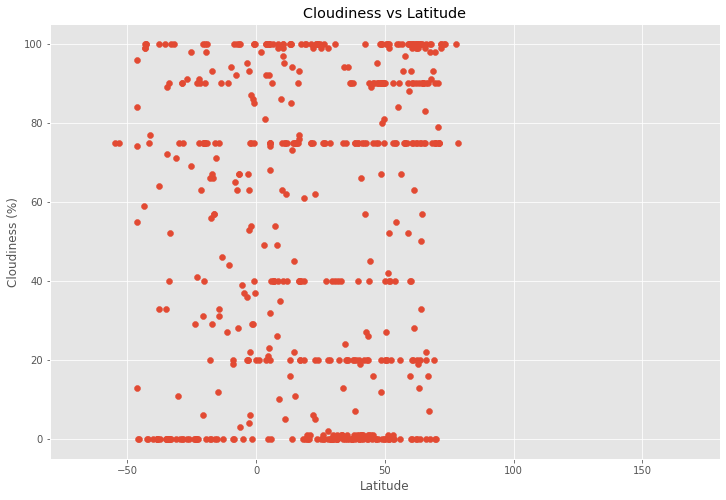

In [16]:
# Latitude vs Cloudliness  

plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-80,180)
plt.title("Cloudiness vs Latitude")

# Save image
plt.savefig("weather_df{}.png")
plt.show()

#### Latitude vs. Wind Speed Plot

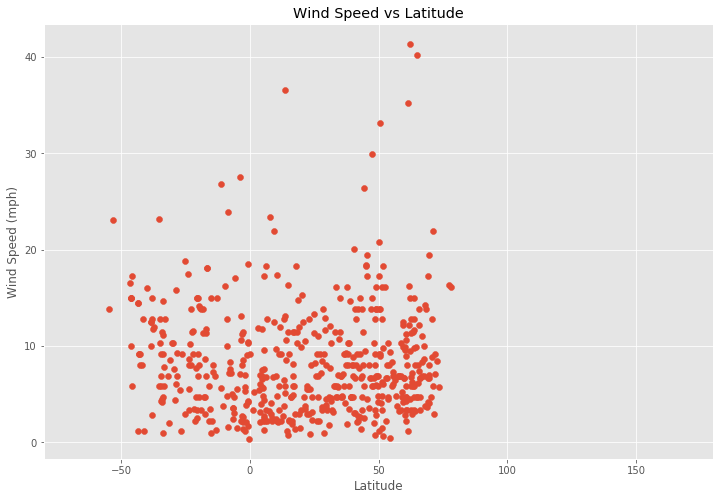

In [21]:
# Latitude vs Wind Speed
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,180)
plt.title("Wind Speed vs Latitude")
# Save image
plt.savefig("weather_df{}.png")
plt.show()


## Linear Regression

R squard: -0.49342207177959946


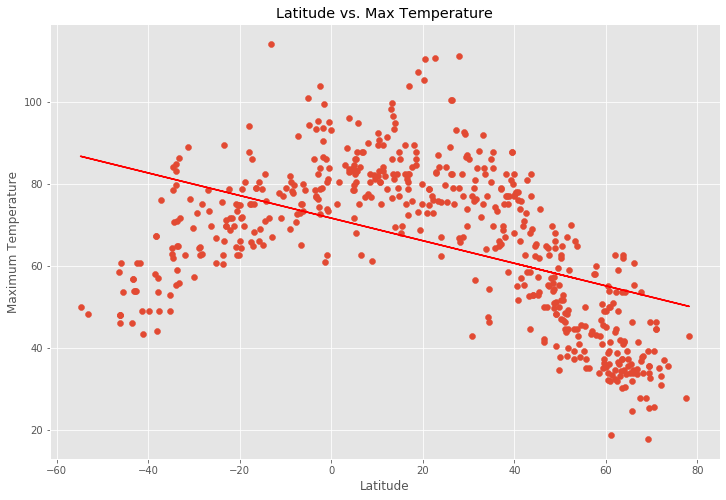

In [22]:

#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title("Latitude vs. Max Temperature")

# Save image
print(f"R squard: {rvalue}")
plt.savefig("weather_df{}.png")
plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression